# Power Spectrum

### Find the power spectra of TEM/synthetic particle images and compare. Two different methods used.

In [ ]:
from matplotlib import pyplot as plt
plt.style.use("science")
import matplotlib.image as mpimg
%matplotlib inline
import scipy.stats as stats
import numpy as np

In [2]:
def power_spectrum(img, save_name, label):
    
    npix=img.shape[0]
    fourier_img = np.fft.fftn(img)
    fourier_amplitudes = np.abs(fourier_img)**2
    kfreq = np.fft.fftfreq(npix)*npix
    kfreq2D = np.meshgrid(kfreq, kfreq)
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
    knrm = knrm.flatten()
    fourier_amplitudes = fourier_amplitudes.flatten()
    kbins = np.arange(0.5, npix//2+1, 1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])

    Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes, statistic="mean", bins=kbins)
    Abins *= np.pi *(kbins[1:]**2 - kbins[:-1]**2)

    return kvals, Abins
    
#     plt.tight_layout()
#     plt.savefig(save_name)
#     plt.close()

In [3]:
img = mpimg.imread("../full-size/tem/ASM306_grayscale_0000.tif")
img = img[824:3000, 824:3000]
kvals1, Abins1 = power_spectrum(img, "tem_power_spectrum.eps", "TEM")

In [4]:
img = mpimg.imread("../full-size/synthetic/particles31.tif")
kvals2, Abins2 = power_spectrum(img, "synth_power_spectrum.eps", "synthetic")

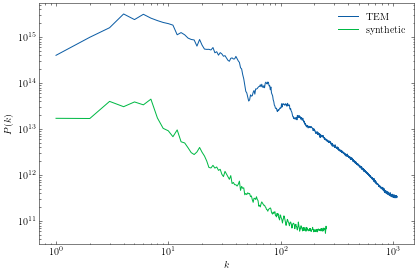

In [6]:
plt.loglog(kvals1, Abins1, label="TEM")
plt.loglog(kvals2, Abins2, label="synthetic")
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.legend()
plt.tight_layout()
plt.show()
# plt.savefig("combined_power_spectrum.eps")
plt.close()

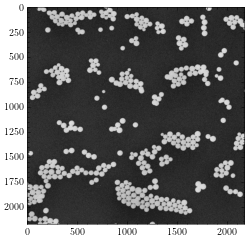

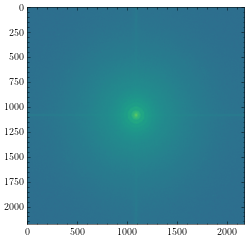

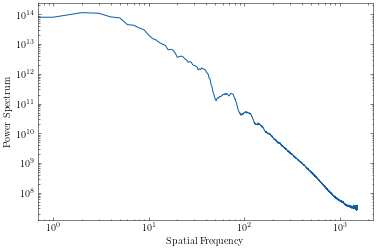

In [12]:
from scipy import fftpack
#import pyfits
import numpy as np
import pylab as py
import radialProfile
image = mpimg.imread("../full-size/tem/ASM306_grayscale_0000.tif")
image = image[824:3000, 824:3000]

# Take the fourier transform of the image.
F1 = fftpack.fft2(image)

# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
F2 = fftpack.fftshift(F1)

# Calculate a 2D power spectrum
psd2D = np.abs(F2)**2

# Calculate the azimuthally averaged 1D power spectrum
psd1D = radialProfile.azimuthalAverage(psd2D)

# Now plot up both
py.figure(1)
py.clf()
py.imshow( np.log10( image ), cmap=py.cm.Greys)

py.figure(2)
py.clf()
py.imshow( np.log10( psd2D ))

py.figure(3)
py.clf()
py.loglog( psd1D )
py.xlabel("Spatial Frequency")
py.ylabel("Power Spectrum")

py.show()

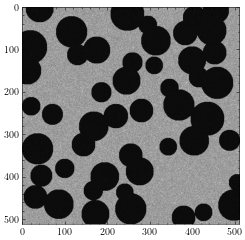

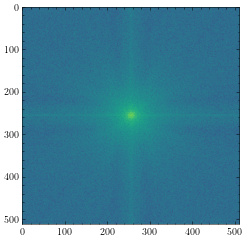

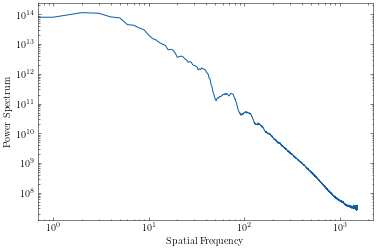

In [13]:
image = mpimg.imread("../full-size/synthetic/particles31.tif")
#image = image[824:3000, 824:3000]

# Take the fourier transform of the image.
F1 = fftpack.fft2(image)

# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
F2 = fftpack.fftshift(F1)

# Calculate a 2D power spectrum
psd2D = np.abs(F2)**2

# Calculate the azimuthally averaged 1D power spectrum
psd1D_syn = radialProfile.azimuthalAverage(psd2D)

# Now plot up both
py.figure(1)
py.clf()
py.imshow( np.log10( image ), cmap=py.cm.Greys)

py.figure(2)
py.clf()
py.imshow( np.log10( psd2D ))

py.figure(3)
py.clf()
py.loglog( psd1D )
py.xlabel("Spatial Frequency")
py.ylabel("Power Spectrum")

py.show()

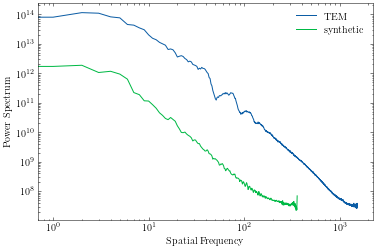

In [15]:
py.figure()
py.clf()
py.loglog(psd1D, label="TEM")
py.loglog(psd1D_syn, label="synthetic")
py.xlabel("Spatial Frequency")
py.ylabel("Power Spectrum")
py.legend()
py.savefig("combined_power_spectrum_2.eps")
py.show()